In [8]:
#Import the usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

# Inferential Statistics

1. T test single population mean
1. T test independence double population mean
    1. equal variance
    1. non equal variance
1. T test paired 
1. F test for more than two population mean
1. Proportion Test

## One Sample T-Test

In [9]:
from scipy.stats import ttest_1samp
import numpy as np
ages = np.round(np.random.normal(30,4,40))

In [10]:
df = pd.DataFrame({'ages':ages})

In [11]:
df.head()

,ages
0,32.0
1,25.0
2,22.0
3,33.0
4,30.0


In [12]:
df['ages'].describe()

count    40.000000
mean     30.050000
std       4.088445
min      22.000000
25%      27.000000
50%      29.000000
75%      33.000000
max      38.000000
Name: ages, dtype: float64

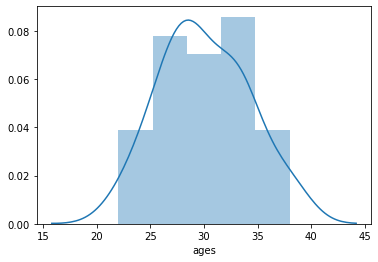

In [13]:
sns.distplot(df['ages'])

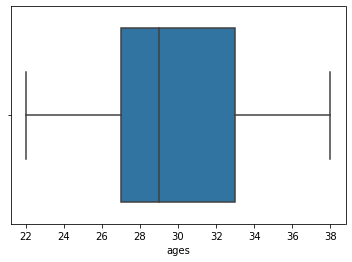

In [14]:
sns.boxplot(df['ages'])

Ho : Age Mean Population = 27 vs Ha : Age Mean Population > 27

In [15]:
tset, pval = ttest_1samp(df['ages'], 27)
print('p-value',pval/2)

p-value 1.5174840548178607e-05


The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, Mean population Age is higher than 27 with signicant level 5%. 

## Two Sample Independent T-Test

Let's create the dataset

In [16]:
hat = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],name = 'Wearing Hat'),
                pd.Series(data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')],axis = 1)

In [17]:
hat

,Wearing Hat,Score
0,Yes,70
1,No,85
2,Yes,80
3,Yes,45
4,No,80
5,No,70
6,No,90
7,Yes,70
8,Yes,55
9,No,80


Text(0, 0.5, 'Frequency')

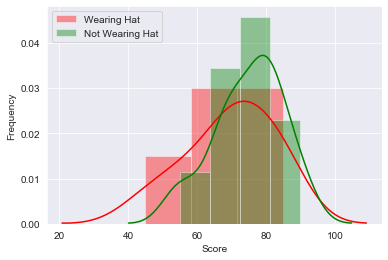

In [18]:
sns.set_style('darkgrid')
sns.distplot(hat[hat['Wearing Hat'] == 'Yes']['Score'], color = 'red', label = 'Wearing Hat')
sns.distplot(hat[hat['Wearing Hat'] == 'No']['Score'], color = 'green', label ='Not Wearing Hat')
plt.legend()
plt.ylabel('Frequency')

The distribution is seems to follow the Normal Distribution, let's try use the Independent T-Test from the Scipy

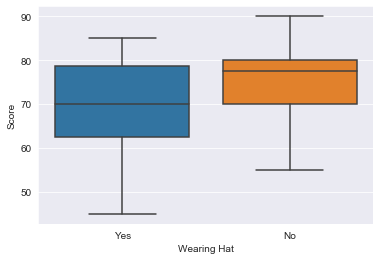

In [19]:
sns.boxplot(x = 'Wearing Hat', y = 'Score', data = hat)

Ho : Mean Popolation of Score not wearing hat = Mean Popolation of Score wearing hat 
<br>
Ha : Mean Popolation of Score not wearing hat > Mean Popolation of Score wearing hat

non equal variance assumption

In [20]:
from scipy.stats import ttest_ind
result = list(ttest_ind(
    hat[hat['Wearing Hat'] == 'No']['Score'], 
    hat[hat['Wearing Hat'] == 'Yes']['Score'],
    equal_var = False
))
print('T-Statistic:', result[0])
print('P-Value:', result[1]/2)

T-Statistic: 1.0493389512356741
P-Value: 0.1543203279173745


equal variance assumption

In [21]:
from scipy.stats import ttest_ind
result = list(ttest_ind(
    hat[hat['Wearing Hat'] == 'No']['Score'], 
    hat[hat['Wearing Hat'] == 'Yes']['Score'],
    equal_var = True
))
print('T-Statistic:', result[0])
print('P-Value:', result[1]/2)

T-Statistic: 1.049338951235674
P-Value: 0.15395387283575154


The P-value is higher than our significant level 0.05, it means we don't have enough evidence to reject the Null Hypothesis. So, Mean Popolation of Score not wearing hat are still aproximately equal to Mean Popolation of Score wearing hat.

## T-Test Paired

reaction time on driving skill before and while using cell phone

In [22]:
with_cell_phone = [604,556,540,522,469,544,513,470,556,531,599,537,619,536,554,467]
without_cell_phone = [636,623,615,672,601,600,542,554,543,520,609,559,595,565,573,554]

df_paired = pd.DataFrame({
    'no':without_cell_phone,
    'yes':with_cell_phone
})

In [23]:
df_paired['diff'] = df_paired['yes'] - df_paired['no']

In [24]:
df_paired.head(10)

,no,yes,diff
0,636,604,-32
1,623,556,-67
2,615,540,-75
3,672,522,-150
4,601,469,-132
5,600,544,-56
6,542,513,-29
7,554,470,-84
8,543,556,13
9,520,531,11


In [25]:
df_paired['diff'].describe()

count     16.000000
mean     -46.500000
std       50.146452
min     -150.000000
25%      -77.250000
50%      -30.500000
75%      -16.750000
max       24.000000
Name: diff, dtype: float64

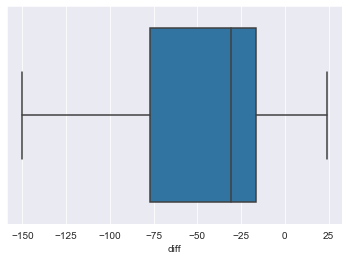

In [26]:
sns.boxplot(df_paired['diff'])

Ho : Mean Population of difference (yes-no) = 0
<br>
Ha : Mean Population of difference (yes-no) < 0

In [27]:
tset, pval = ttest_1samp(df_paired['diff'], 0)
print(pval/2)
print(tset)

0.0010497189034628326
-3.7091357792693707


The P-value is lower than our significant level 0.05, it means we have enough evidence to reject the Null Hypothesis. So, reaction time on driving skill after using cell phone are lower than before using cell phone 

## Manual Calculation one sample T-Test for mean

In [28]:
from scipy import stats

In [29]:
age = [27, 26, 27, 29, 23, 30, 23, 31, 29, 31, 30, 23, 34, 24, 24, 25, 30,
       26, 28, 32]

\begin{align}
H_o : \mu = 26
\end{align}
\begin{align}
H_a : \mu > 26 \textrm{  or  } H_a : \mu < 30 \textrm{  or  } H_a : \mu \neq 26 
\end{align}

In [30]:
x_bar = np.mean(age)
s = np.std(age, ddof = 1)
n = len(age)
mu = 26

print("rata-rata contoh",x_bar)
print("standar deviasi contoh",s)
print("banyaknya contoh",n)

rata-rata contoh 27.6
standar deviasi contoh 3.299122690400554
banyaknya contoh 20


\begin{align}
T = \frac{\bar{x} - \mu}{s/\sqrt{n}}
\end{align}

In [31]:
T = (x_bar - mu)/(s/np.sqrt(n))
print(T)

2.168884942902981


### 1. rejection region if the alternate hypothesis

\begin{align}
H_a : \mu > 26
\end{align}

the rejection region will be:

\begin{align}
T > T_\alpha,db = n-1
\end{align}

\begin{align}
T_\alpha,db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [32]:
alpha = 0.05
T_alfa_db = stats.t.ppf(1-alpha,n-1)
print('critical value',T_alfa_db)

critical value 1.729132811521367


T statistics is greater than the critical value(reject Ho)
\begin{align}
T = 2.168 > T_\alpha,db = n-1 = 1.729
\end{align}

rejection region using p-value (reject Ho)

In [33]:
x_axis = [i/10 for i in range(-35,36)]
y_axis = [stats.t.pdf(i,n-1) for i in x_axis]

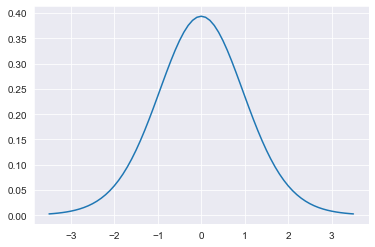

In [34]:
plt.plot(x_axis,y_axis)

In [35]:
print('p-value = P(T>2.168) = ',stats.t.sf(T,n-1))

p-value = P(T>2.168) =  0.021494127565753255


rejection region using p-value scipy (reject Ho)

In [36]:
tstat, p_value = ttest_1samp(age,26) 

In [37]:
print('t statistics',tstat)
print('t statistics',p_value/2) # divided by 2 because only one sidedd

t statistics 2.168884942902981
t statistics 0.021494127565753255


with significant level 5%, we have enough evidence that age mean of population is greater than 26

![alt text](https://lh4.googleusercontent.com/dH_I0v2ho0IGauXHkoPRDXSsvSbdOodk3y_m1Lbr_qmXyrT-FosXZUB32cr-xP7QIwO_gI8Zy-D3rznFqj9Igg2SmH9HE2JQCTdAHUEW)

### 2. rejection region if the alternate hypothesis

\begin{align}
H_a : \mu < 26
\end{align}

the rejection region will be:

\begin{align}
T < -T_\alpha,db = n-1
\end{align}

\begin{align}
T_\alpha,db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [38]:
alpha = 0.05
T_alfa_db = stats.t.ppf(1-alpha,n-1)
print('critical value',-T_alfa_db)

critical value -1.729132811521367


T statistics is greater than the critical value (don't reject Ho):
\begin{align}
T = 2.168 > -T_\alpha,db = n-1 = -1.729
\end{align}

rejection region using p-value

In [39]:
print('p-value',stats.t.sf(-T,n-1))

p-value 0.9785058724342468


hyphotesis testing using of one sample ttest for mean in scipy is not supported when: 
1. this cases : mean sample is greater (27.6) than hypotetical mean (26) and the alternate is less than ($H_a : \mu < 26$)
2. mean sample is less than hypotetical mean and the alternate is greater than

### 3. rejection region if the alternate hypothesis

\begin{align}
H_a : \mu \neq 26
\end{align}

the rejection region will be:

\begin{align}
T < -T_\alpha/2,db = n-1 \textrm{ or } T > T_\alpha/2,db = n-1
\end{align}

\begin{align}
T_\alpha,db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [40]:
alpha = 0.05
T_alfa2_db = stats.t.ppf(1-alpha/2,n-1)
print('critical value left',-T_alfa2_db)
print('or')
print('critical value right',T_alfa2_db)

critical value left -2.093024054408263
or
critical value right 2.093024054408263


T statistics is greater than the critical value (reject Ho):
\begin{align}
T = 2.168 > T_\alpha/2,db = n-1 = 2.093
\end{align}

rejection region using p-value (reject Ho)

In [41]:
print('p-value',stats.t.sf(abs(T),n-1)*2)

p-value 0.04298825513150651


rejection region using p-value scipy (reject Ho)

In [42]:
tstat, p_value = ttest_1samp(age,26) 

In [43]:
print('t statistics',tstat)
print('t statistics',p_value) 

t statistics 2.168884942902981
t statistics 0.04298825513150651


with significant level 5%, we have enough evidence that age mean of population is not equal to 26